In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\sneet\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [11]:
import numpy as np
from numpy import zeros, copy, maximum

imax=101
jmax=51

Psi = zeros((imax,jmax))
dx = 2.0/(imax-1)

for i in range(imax):
    x = dx*i
    Psi[i,0] = 200-100*x
    Psi[i,jmax-1] = 100.0
print(Psi)
print()

for j in range(jmax):
    y = dx*j
    Psi[0,j] = 200.0-100*y
    Psi[imax-1,j] = 100.0*y
print(Psi)
print()

for i in range(1,imax-1,1):
    for j in range(1,jmax-1,1):
        Psi[i,j] = 50.0
print(Psi)
print()

residave = 1000.0
cnt=0
a=1.0; b=1.0; c=1.0; d=1.0; e=-4.0; f=0.0

Psi_old = copy(Psi)

while residave>1.0e-6:
    norm_tot=0
    residtot=0.0
    for i in range(1,imax-1,1):
        for j in range(1,jmax-1,1):
            #calculate the new value of Psi based on the old value using the Jacobi method
            Psi[i,j] = (f-(a*Psi_old[i+1,j]+b*Psi_old[i-1,j]+c*Psi_old[i,j+1]+d*Psi_old[i,j-1]))/e
            norm_tot += abs(Psi[i,j])
            residtot += abs(Psi_old[i,j]-Psi[i,j])


    residave = residtot / maximum(norm_tot,1.0e-10)
    cnt+=1
    #swap Psi and Psi_old without having to copy the data
    temp = Psi
    Psi = Psi_old
    Psi_old = temp
    
    if cnt%100==0:
        print("%g: resid=%f" % (cnt,residave))

[[200.   0.   0. ...   0.   0. 100.]
 [198.   0.   0. ...   0.   0. 100.]
 [196.   0.   0. ...   0.   0. 100.]
 ...
 [  4.   0.   0. ...   0.   0. 100.]
 [  2.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]]

[[200. 198. 196. ... 104. 102. 100.]
 [198.   0.   0. ...   0.   0. 100.]
 [196.   0.   0. ...   0.   0. 100.]
 ...
 [  4.   0.   0. ...   0.   0. 100.]
 [  2.   0.   0. ...   0.   0. 100.]
 [  0.   2.   4. ...  96.  98. 100.]]

[[200. 198. 196. ... 104. 102. 100.]
 [198.  50.  50. ...  50.  50. 100.]
 [196.  50.  50. ...  50.  50. 100.]
 ...
 [  4.  50.  50. ...  50.  50. 100.]
 [  2.  50.  50. ...  50.  50. 100.]
 [  0.   2.   4. ...  96.  98. 100.]]

100: resid=0.001267
200: resid=0.000735
300: resid=0.000515
400: resid=0.000394
500: resid=0.000317
600: resid=0.000264
700: resid=0.000223
800: resid=0.000190
900: resid=0.000163
1000: resid=0.000141
1100: resid=0.000122
1200: resid=0.000106
1300: resid=0.000092
1400: resid=0.000080
1500: resid=0.000070
1600: r

[[200.   0.   0. ...   0.   0. 100.]
 [198.   0.   0. ...   0.   0. 100.]
 [196.   0.   0. ...   0.   0. 100.]
 ...
 [  4.   0.   0. ...   0.   0. 100.]
 [  2.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]]

[[200. 198. 196. ... 104. 102. 100.]
 [198.   0.   0. ...   0.   0. 100.]
 [196.   0.   0. ...   0.   0. 100.]
 ...
 [  4.   0.   0. ...   0.   0. 100.]
 [  2.   0.   0. ...   0.   0. 100.]
 [  0.   2.   4. ...  96.  98. 100.]]

[[200. 198. 196. ... 104. 102. 100.]
 [198.  50.  50. ...  50.  50. 100.]
 [196.  50.  50. ...  50.  50. 100.]
 ...
 [  4.  50.  50. ...  50.  50. 100.]
 [  2.  50.  50. ...  50.  50. 100.]
 [  0.   2.   4. ...  96.  98. 100.]]



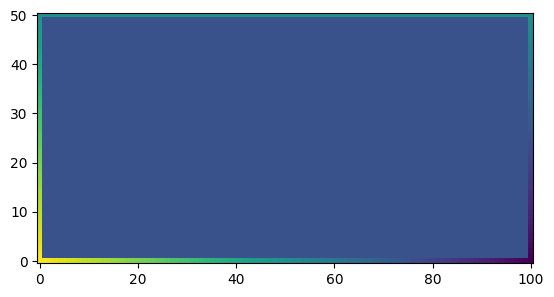

In [10]:
imax=101
jmax=51

Psi = zeros((imax,jmax))
dx = 2.0/(imax-1)

for i in range(imax):
    x = dx*i
    Psi[i,0] = 200-100*x
    Psi[i,jmax-1] = 100.0
print(Psi)
print()

for j in range(jmax):
    y = dx*j
    Psi[0,j] = 200.0-100*y
    Psi[imax-1,j] = 100.0*y
print(Psi)
print()

for i in range(1,imax-1,1):
    for j in range(1,jmax-1,1):
        Psi[i,j] = 50.0
print(Psi)
print()

plt.imshow(Psi.transpose(),origin='lower')

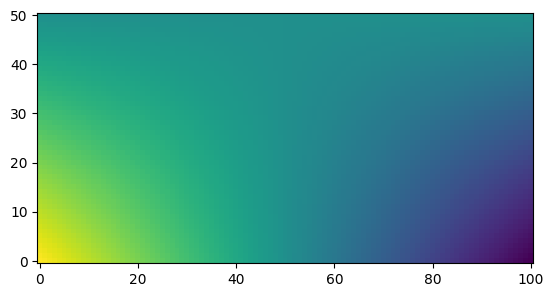

In [8]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
plt.imshow(Psi.transpose(),origin='lower')

In [12]:
fx=zeros((imax,jmax))
fy=zeros((imax,jmax))

for i in range(0,imax,1):
    for j in range(0,jmax,1):
        if j>0 and j<jmax-1:
            fx[i,j]=(Psi[i,j+1]-Psi[i,j-1])/(2.*dx)
        elif j>0:
            fx[i,j]=(Psi[i,j]-Psi[i,j-1])/dx
        else:
            fx[i,j]=(Psi[i,j+1]-Psi[i,j])/dx
            
        if i>0 and i<imax-1:
            fy[i,j]=-(Psi[i+1,j]-Psi[i-1,j])/(2.*dx)
        elif i>0:
            fy[i,j]=-(Psi[i,j]-Psi[i-1,j])/dx
        else:
            fy[i,j]=-(Psi[i+1,j]-Psi[i,j])/dx
        

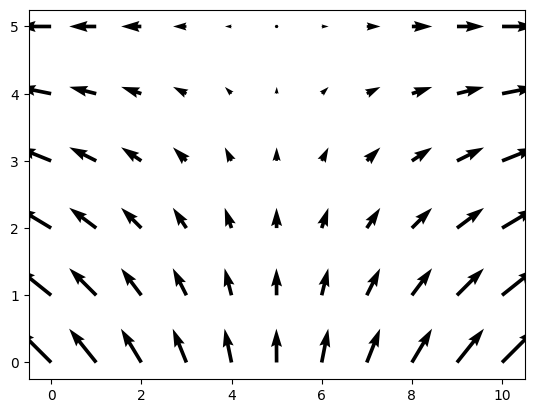

In [14]:
stride = 10
plt.quiver(fx.transpose()[::stride,::stride],fy.transpose()[::stride,::stride])

In [12]:
import math
import scipy.linalg as sl
import numpy as np

imax=101
jmax=51

Psi = zeros((imax,jmax))
resid = zeros((imax,jmax))
dx=2.0/(imax-1)

for i in range(imax):
    x=dx*i
    Psi[i,0]=200-100*x
    Psi[i,jmax-1]=100.0

for j in range(jmax):
    y=dx*j
    Psi[0,j]=200.0-100*y
    Psi[imax-1,j]=100.0*y
    
for i in range(1,imax-1,1):
    for j in range(1,jmax-1,1):
        Psi[i,j] = 50.0
    
residave = 1000.0
cnt = 0

a = 1.0; b = 1.0; c = 1.0; d = 1.0; e = -4.0; f = 0.0

Psi_old = copy(Psi)

while residave>1.0e-6:
    Psi[1:-1, 1:-1] = (1.0 / e) * (f - (a * Psi_old[2:, 1:-1] + b * Psi_old[:-2, 1:-1] + c * Psi_old[1:-1, 2:] + d * Psi_old[1:-1, :-2]))
    residave = sl.norm(Psi-Psi_old)/np.maximum(1.0e-10,sl.norm(Psi))
    
    temp = Psi
    Psi = Psi_old
    Psi_old = temp
    
    cnt+=1
    if cnt%100==0:
        print("%g: resid=%f" % (cnt,residave))


100: resid=0.001566
200: resid=0.000837
300: resid=0.000583
400: resid=0.000451
500: resid=0.000366
600: resid=0.000304
700: resid=0.000256
800: resid=0.000218
900: resid=0.000186
1000: resid=0.000160
1100: resid=0.000139
1200: resid=0.000120
1300: resid=0.000105
1400: resid=0.000091
1500: resid=0.000080
1600: resid=0.000070
1700: resid=0.000061
1800: resid=0.000053
1900: resid=0.000047
2000: resid=0.000041
2100: resid=0.000036
2200: resid=0.000032
2300: resid=0.000028
2400: resid=0.000025
2500: resid=0.000022
2600: resid=0.000019
2700: resid=0.000017
2800: resid=0.000015
2900: resid=0.000013
3000: resid=0.000012
3100: resid=0.000010
3200: resid=0.000009
3300: resid=0.000008
3400: resid=0.000007
3500: resid=0.000006
3600: resid=0.000006
3700: resid=0.000005
3800: resid=0.000004
3900: resid=0.000004
4000: resid=0.000003
4100: resid=0.000003
4200: resid=0.000003
4300: resid=0.000002
4400: resid=0.000002
4500: resid=0.000002
4600: resid=0.000002
4700: resid=0.000001
4800: resid=0.000001
4

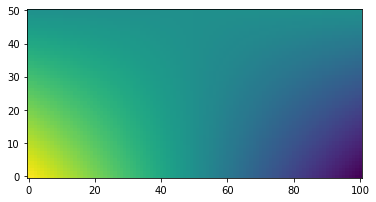

In [18]:
fig1 = figure()
imshow(Psi.transpose(),origin='lower')